**Prototyping metrics-driven report**

Create a metrics-driven report of trends and topics of interest, and how they shift over time

In [3]:
from pandas import read_csv
import pandas as pd

In [4]:
''' work with engagement data '''
from google.colab import files
files.upload()
import os
print(os.listdir())

Saving engagements.csv to engagements.csv
['.config', 'engagements.csv', 'sample_data']


In [5]:
''' perform basic data exploration '''
df = pd.read_csv('engagements.csv')
df.head()[:5]
df.info()
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17841 entries, 0 to 17840
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   timestamp      17841 non-null  object
 1   media_id       17841 non-null  int64 
 2   media_caption  17830 non-null  object
 3   comment_text   17812 non-null  object
dtypes: int64(1), object(3)
memory usage: 557.7+ KB


,media_id
count,1.784100e+04
mean,1.523853e+16
std,6.297452e+15
min,8.955051e+14
25%,1.803634e+16
50%,1.803634e+16
75%,1.805140e+16
max,1.849999e+16


In [6]:
''' Handle any missing values, convert data types if necessary,
and extract relevant information (like date/time components)
'''
df['timestamp'] = pd.to_datetime(df['timestamp'], format='mixed')
df['date'] = df['timestamp'].dt.date
df['media_caption'].fillna('', inplace=True)
df['comment_text'].fillna('', inplace=True)
display(df.head())
display(df.info())

/tmp/ipython-input-2264428042.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['media_caption'].fillna('', inplace=True)
/tmp/ipython-input-2264428042.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

,timestamp,media_id,media_caption,comment_text,date
0,2025-03-01 00:13:57.153000+00:00,1090986906404998,"Soft skin, soft life 🩷🌸🫧 get your hands on thi...",I bet this is good,2025-03-01
1,2025-03-01 00:23:06.879000+00:00,17950254656929862,Why use one scrub when you can use them all at...,i know this smells so good,2025-03-01
2,2025-03-01 00:04:05.094000+00:00,1090109319826090,Morning routine with Tree Hut 🍊🫧 Now available...,Love it,2025-03-01
3,2025-03-01 00:41:59.467000+00:00,1098364052333950,Why use one scrub when you can use them all at...,Please carry these in Canada! I miss them so m...,2025-03-01
4,2025-03-01 02:21:29.715000+00:00,1083943630442659,Vanilla Serum-Infused Hand Wash: A sweet escap...,I love it ..✌️,2025-03-01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17841 entries, 0 to 17840
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   timestamp      17841 non-null  datetime64[ns, UTC]
 1   media_id       17841 non-null  int64              
 2   media_caption  17841 non-null  object             
 3   comment_text   17841 non-null  object             
 4   date           17841 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(3)
memory usage: 697.0+ KB


None

### Engagement Trends Analysis:

**Engagement Trends:**

- **Daily Engagement:**
  The daily engagement plot shows significant fluctuations, with notable spikes on certain dates
  These spikes suggest specific events or content triggered exceptionally high user interaction.
  Otherwise, daily engagement generally remained within a lower range.
- **Weekly Engagement:** The weekly engagement plot smooths out the daily fluctuations,
  revealing an overall upward trend in engagement from early March.
  This indicates that despite daily variability, there was a period of sustained high engagement.
- **Monthly Engagement:** The monthly engagement plot shows a sharp decrease from March to April.


In [7]:
'''  Analyze engagement trends
how engagement metrics (likes, comments, etc.) change over time, this could be
time series analysis to identify daily, weekly, or monthly patterns

Group the DataFrame by date, count the entries, reset the index,
and sort by date to prepare for time series analysis.
'''
daily_engagement = df.groupby('date').size().reset_index(name='engagement_count')
daily_engagement['date'] = pd.to_datetime(daily_engagement['date'])
daily_engagement = daily_engagement.sort_values(by='date')
display(daily_engagement.head())

,date,engagement_count
0,2025-03-01,165
1,2025-03-02,108
2,2025-03-03,132
3,2025-03-04,194
4,2025-03-05,276


In [8]:
'''
the weekly and monthly engagement by resampling the daily engagement data and
then display the first few rows of the daily, weekly, and monthly engagement
dataframes to verify the results
'''
weekly_engagement = daily_engagement.resample('W', on='date')[
    'engagement_count'].sum().reset_index(name='weekly_engagement_count')
monthly_engagement = daily_engagement.resample('M', on='date')[
    'engagement_count'].sum().reset_index(name='monthly_engagement_count')

print("Daily Engagement:")
display(daily_engagement.head())
print("\nWeekly Engagement:")
display(weekly_engagement.head())
print("\nMonthly Engagement:")
display(monthly_engagement.head())

Daily Engagement:


/tmp/ipython-input-1546274643.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_engagement = daily_engagement.resample('M', on='date')[


,date,engagement_count
0,2025-03-01,165
1,2025-03-02,108
2,2025-03-03,132
3,2025-03-04,194
4,2025-03-05,276



Weekly Engagement:


,date,weekly_engagement_count
0,2025-03-02,273
1,2025-03-09,1192
2,2025-03-16,3207
3,2025-03-23,7134
4,2025-03-30,2856



Monthly Engagement:


,date,monthly_engagement_count
0,2025-03-31,15343
1,2025-04-30,2498


### Identify topics of interest

In [9]:
'''
If the data includes post content or tags, perform text analysis
(like topic modeling or keyword extraction) to identify popular themes

Combine the text columns, clean the text by converting to lowercase,
removing punctuation, and removing stop words, and then calculate word frequencies.
'''

import string
from nltk.corpus import stopwords
import nltk

try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')

# 1. Combine the media_caption and comment_text columns
df['combined_text'] = df['media_caption'] + ' ' + df['comment_text']

# 2. Perform basic text cleaning
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    return text

df['cleaned_text'] = df['combined_text'].apply(clean_text)

# Remove stop words
stop_words = set(stopwords.words('english'))
df['cleaned_text'] = df['cleaned_text'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# 3. Use a simple word frequency count to identify important terms
word_counts = {}
for text in df['cleaned_text']:
    for word in text.split():
        word_counts[word] = word_counts.get(word, 0) + 1

# Sort words by frequency
sorted_word_counts = sorted(
    word_counts.items(), key=lambda item: item[1], reverse=True)

# Display the top 50 most frequent words
print("Top 50 most frequent words:")
for word, count in sorted_word_counts[:50]:
    print(f"{word}: {count}")

# Display the first few rows with the new columns
display(
  df[['media_caption', 'comment_text', 'combined_text', 'cleaned_text']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Top 50 most frequent words:
treehut: 25622
instagram: 18463
giveaway: 16551
3: 12325
post: 12319
enter: 12308
winners: 12307
applications: 11525
🚨: 11524
pr: 10648
selfcare: 8618
treehutcollection: 8384
break: 7404
love: 7037
want: 6956
💖: 6756
use: 6660
❤️: 6442
would: 6427
us: 6315
way: 6283
agree: 6270
💅: 6243
1: 6199
give: 6192
bestie: 6192
2: 6191
✅: 6187
last: 6186
years: 6177
tag: 6174
4: 6162
share: 6162
message: 6162
chance: 6159
release: 6158
double: 6157
follow: 6157
account: 6157
18: 6155
tap: 6154
sponsored: 6154
associated: 6154
confirm: 6154
residents: 6154
contacting: 6153
notified: 6153
direct: 6153
contest: 6153
administered: 6153


,media_caption,comment_text,combined_text,cleaned_text
0,"Soft skin, soft life 🩷🌸🫧 get your hands on thi...",I bet this is good,"Soft skin, soft life 🩷🌸🫧 get your hands on thi...",soft skin soft life 🩷🌸🫧 get hands selfcare gem...
1,Why use one scrub when you can use them all at...,i know this smells so good,Why use one scrub when you can use them all at...,use one scrub use 🤩 treehut treehutcollection ...
2,Morning routine with Tree Hut 🍊🫧 Now available...,Love it,Morning routine with Tree Hut 🍊🫧 Now available...,morning routine tree hut 🍊🫧 available online i...
3,Why use one scrub when you can use them all at...,Please carry these in Canada! I miss them so m...,Why use one scrub when you can use them all at...,use one scrub use 🤩 please carry canada miss much
4,Vanilla Serum-Infused Hand Wash: A sweet escap...,I love it ..✌️,Vanilla Serum-Infused Hand Wash: A sweet escap...,vanilla seruminfused hand wash sweet escape dr...


**Topic Popularity Trends:**

- **Daily Topic Popularity:**
  The daily topic popularity plots show that the "brand_product" and "user_sentiment"
  topics generally exhibit similar daily patterns, often rising and falling together.
  The "marketing_promotions" topic shows more sporadic peaks,
  often coinciding with or preceding spikes in engagement.
- **Weekly Topic Popularity:**
  On a weekly basis, "brand_product" and "user_sentiment" popularity also tend
  to move in tandem, showing an increase up to the week of March 16th and then a decrease.
- **Monthly Topic Popularity:**
  Similar to monthly engagement, the monthly topic popularity shows a decrease from March to April.
  This is likely influenced by the limited data for April.

In [10]:
''' Examine how the popularity of identified topics shifts over time

Create a combined text column, define keywords for each topic, iterate through
rows to create boolean topic columns, group by date to calculate daily popularity,
convert date to datetime, and sort.
'''
df['combined_text'] = df['media_caption'] + ' ' + df['comment_text']

topic_keywords = {
    'brand_product': ['tree hut', 'scrub', 'butter', 'wash',
                      'scent', 'skin', 'product', 'smell', 'body'],
    'marketing_promotions': ['giveaway', 'contest', 'win', 'enter',
                             'winners', 'tag', 'share', 'follow',
                             'chance', 'promo', 'discount'],
    'user_sentiment': ['love', 'good', 'great', 'amazing', 'help',
                       'favorite', 'want', 'need', 'obsessed', 'repurchase']
}

for topic, keywords in topic_keywords.items():
    df[topic] = df['combined_text'].apply(
        lambda x: any(keyword in x.lower() for keyword in keywords))

daily_topic_popularity = df.groupby('date')[
    list(topic_keywords.keys())].mean().reset_index()
daily_topic_popularity['date'] = pd.to_datetime(daily_topic_popularity['date'])
daily_topic_popularity = daily_topic_popularity.sort_values(by='date')

display(daily_topic_popularity.head())

,date,brand_product,marketing_promotions,user_sentiment
0,2025-03-01,0.872727,0.266667,0.478788
1,2025-03-02,0.796296,0.185185,0.435185
2,2025-03-03,0.810606,0.340909,0.704545
3,2025-03-04,0.824742,0.010309,0.474227
4,2025-03-05,0.634058,0.014493,0.518116


In [11]:
''' Resample the daily topic popularity data to weekly and monthly
frequencies by summing the popularity scores
'''
weekly_topic_popularity = daily_topic_popularity.resample(
    'W', on='date')[list(topic_keywords.keys())].sum().reset_index()
monthly_topic_popularity = daily_topic_popularity.resample(
    'M', on='date')[list(topic_keywords.keys())].sum().reset_index()

print("Weekly Topic Popularity:")
display(weekly_topic_popularity.head())
print("\nMonthly Topic Popularity:")
display(monthly_topic_popularity.head())

Weekly Topic Popularity:


/tmp/ipython-input-975754676.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_topic_popularity = daily_topic_popularity.resample(


,date,brand_product,marketing_promotions,user_sentiment
0,2025-03-02,1.669024,0.451852,0.913973
1,2025-03-09,5.563296,0.484080,3.467090
2,2025-03-16,5.994248,4.128883,5.628051
3,2025-03-23,1.834323,2.497048,5.944589
4,2025-03-30,5.171240,2.956186,5.155987



Monthly Topic Popularity:


,date,brand_product,marketing_promotions,user_sentiment
0,2025-03-31,21.198357,11.406448,22.015710
1,2025-04-30,1.093745,0.395476,0.761012


###Correlate topics and engagement

**Correlation Analysis:**

The heatmap of the correlation matrix provides insights into the relationships
between engagement and topic popularity:

- **User Sentiment and Engagement:**
There is a moderate positive correlation (0.39) between "user_sentiment" popularity
and "engagement_count".
This suggests that content and discussions focusing on user opinions, positive experiences,
and desired products tend to be associated with higher engagement levels.
- **Brand/Product and Engagement:**
There is a moderate negative correlation (-0.40) between "brand_product" popularity
and "engagement_count".
This is counterintuitive and might suggest that content overly focused on just
listing products or brand features without incorporating user perspective or
a call to action is less engaging.
- **Marketing/Promotions and Engagement:**
The correlation between "marketing_promotions" popularity and "engagement_count"
is negligible (-0.01). This indicates that while marketing activities might cause
spikes in engagement on specific days, they don't have a strong consistent linear
relationship with overall daily engagement across the entire period.


In [12]:
'''
Correlate topics and engagement

Merge the daily engagement and daily topic popularity dataframes on the 'date'
column, calculate the correlation matrix, and print
'''
daily_trends = pd.merge(daily_engagement, daily_topic_popularity, on='date')
correlation_matrix = daily_trends.corr(numeric_only=True)
print("Correlation matrix between engagement and topic popularity:")
display(correlation_matrix[['engagement_count']])

Correlation matrix between engagement and topic popularity:


,engagement_count
engagement_count,1.000000
brand_product,-0.404419
marketing_promotions,-0.010446
user_sentiment,0.391179


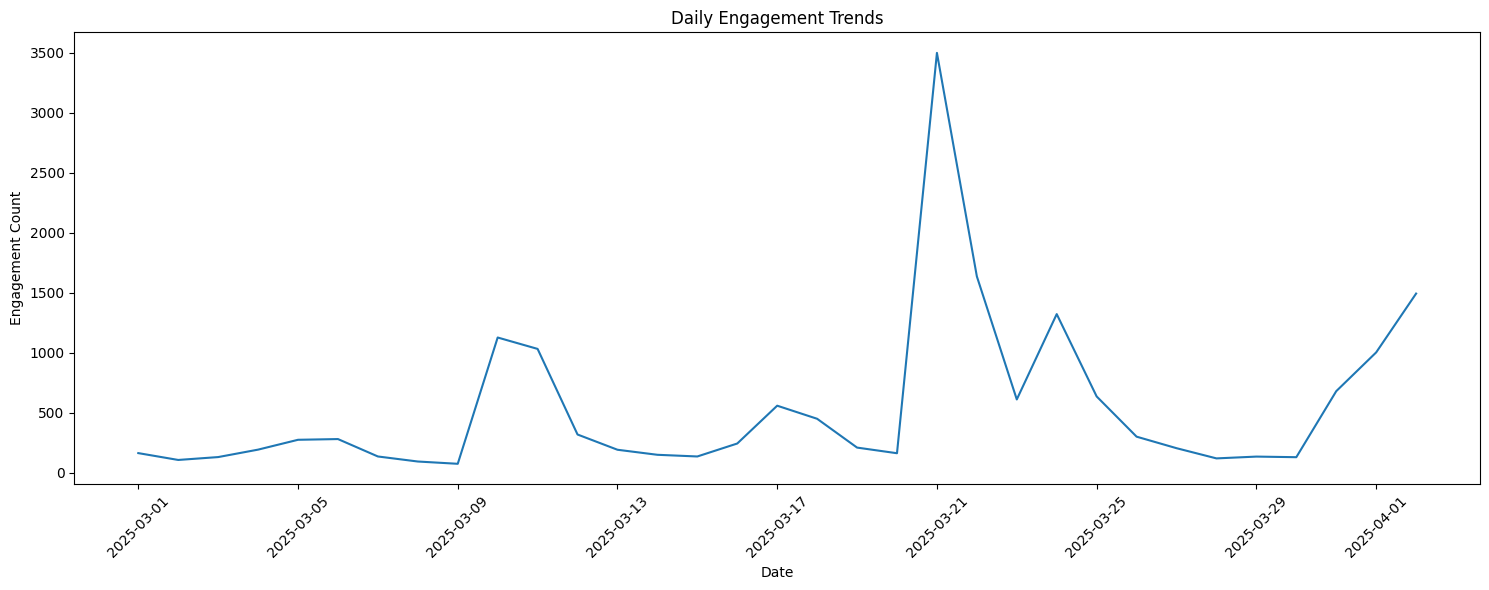

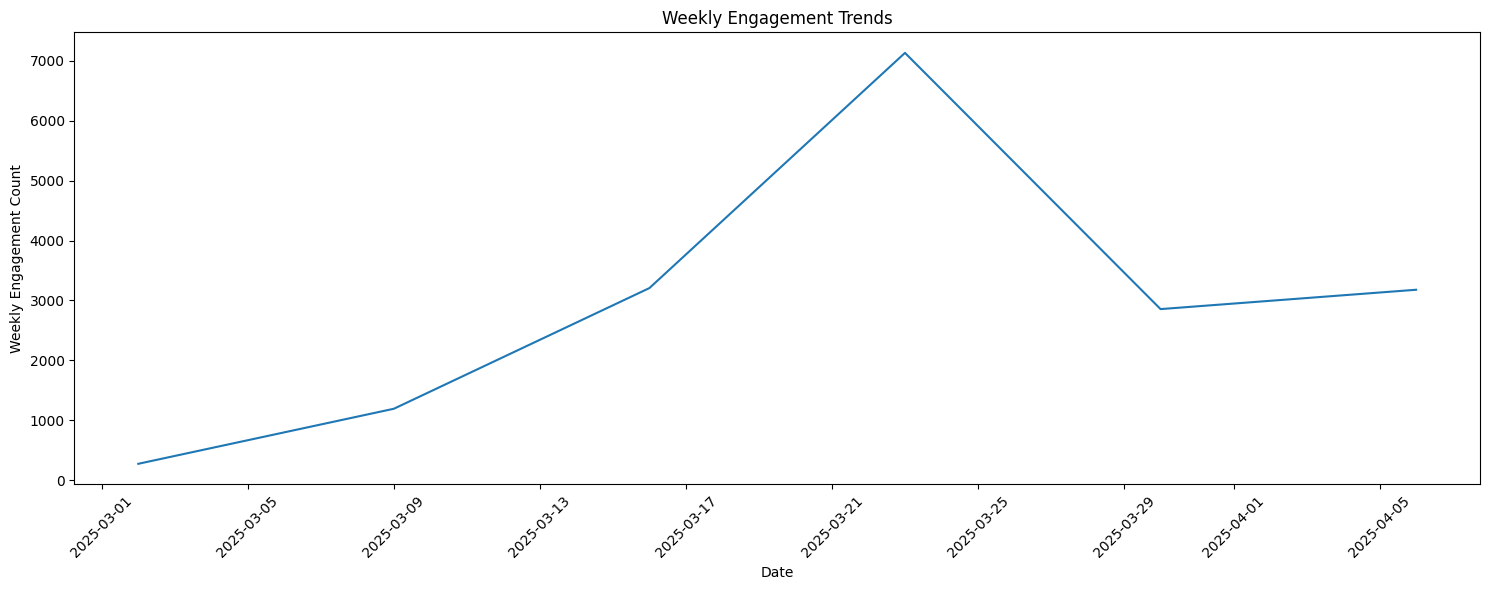

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting daily engagement trends
plt.figure(figsize=(15, 6))
plt.plot(daily_engagement['date'], daily_engagement['engagement_count'])
plt.title('Daily Engagement Trends')
plt.xlabel('Date')
plt.ylabel('Engagement Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting weekly engagement trends
plt.figure(figsize=(15, 6))
plt.plot(weekly_engagement['date'], weekly_engagement['weekly_engagement_count'])
plt.title('Weekly Engagement Trends')
plt.xlabel('Date')
plt.ylabel('Weekly Engagement Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


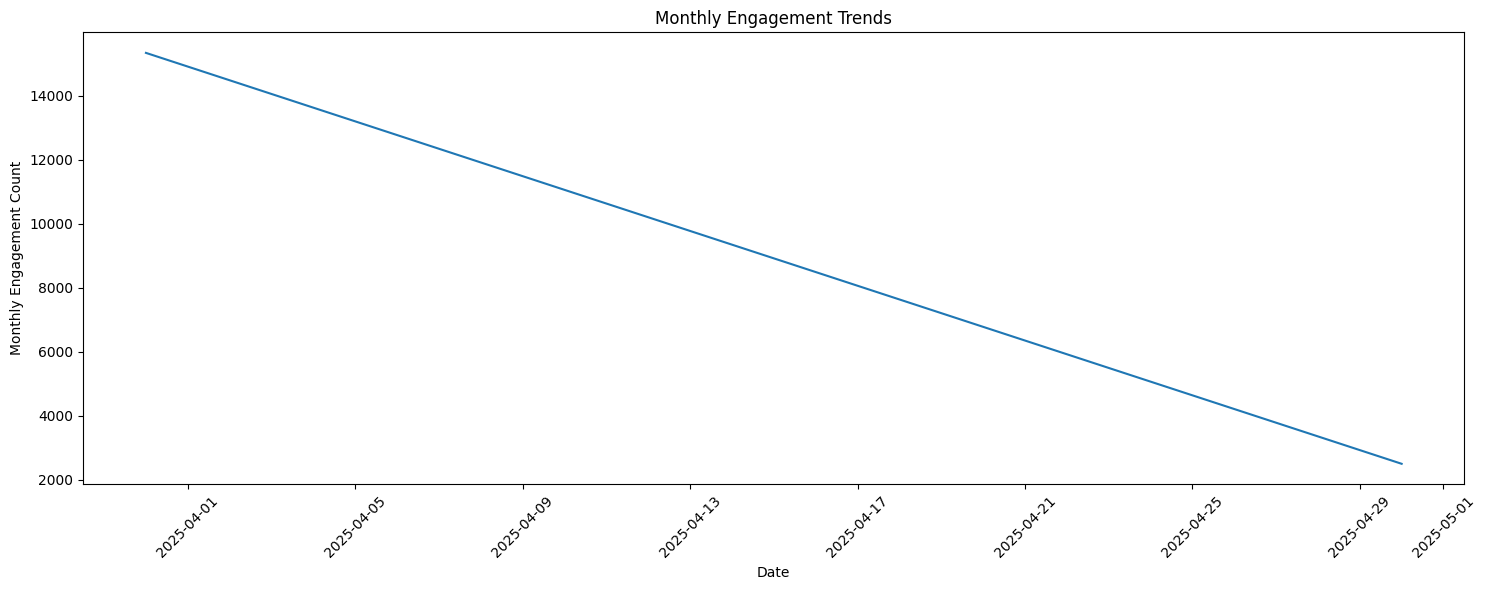

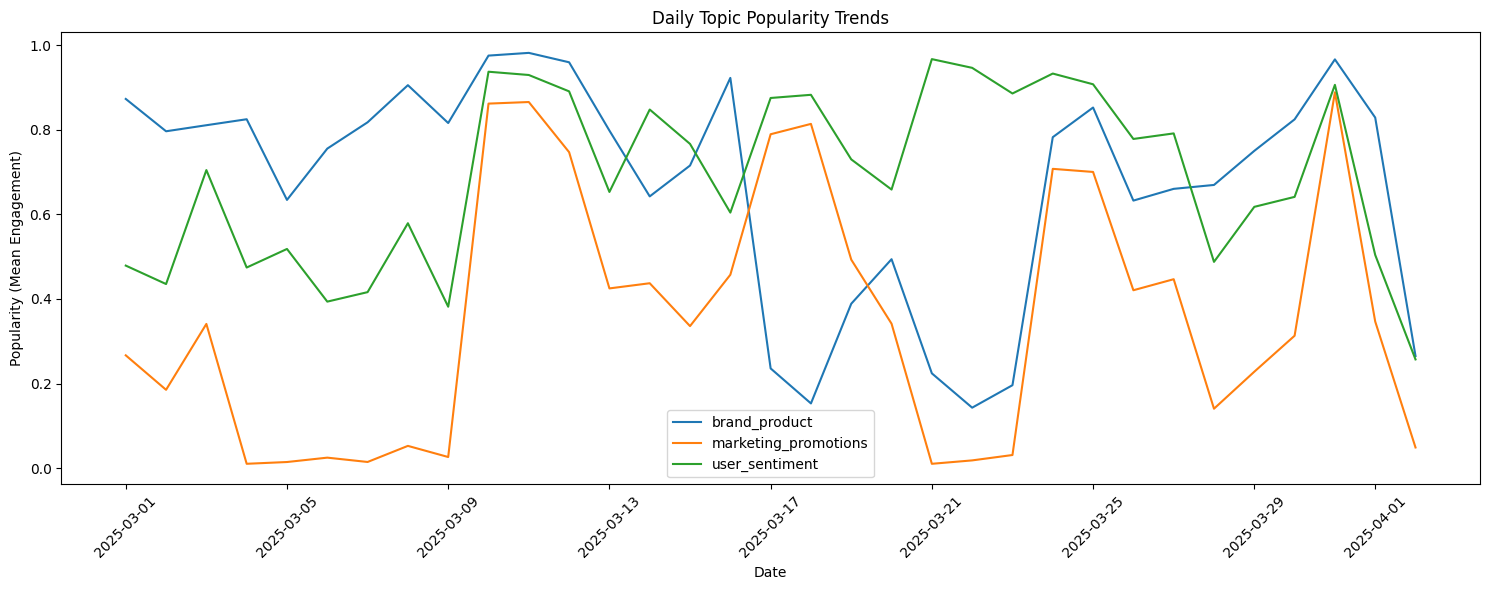

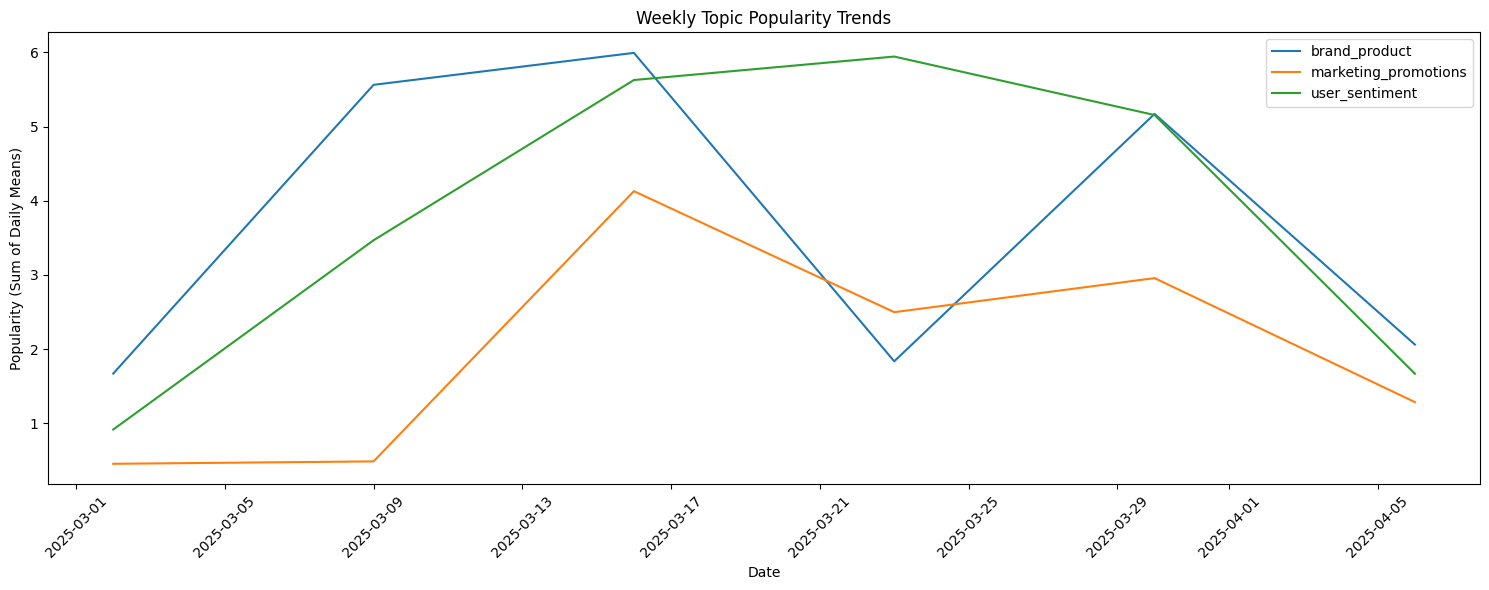

In [14]:

# Plotting monthly engagement trends
plt.figure(figsize=(15, 6))
plt.plot(monthly_engagement['date'], monthly_engagement['monthly_engagement_count'])
plt.title('Monthly Engagement Trends')
plt.xlabel('Date')
plt.ylabel('Monthly Engagement Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting daily topic popularity trends
plt.figure(figsize=(15, 6))
for topic in topic_keywords.keys():
    plt.plot(daily_topic_popularity['date'], daily_topic_popularity[topic], label=topic)
plt.title('Daily Topic Popularity Trends')
plt.xlabel('Date')
plt.ylabel('Popularity (Mean Engagement)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting weekly topic popularity trends
plt.figure(figsize=(15, 6))
for topic in topic_keywords.keys():
    plt.plot(weekly_topic_popularity['date'], weekly_topic_popularity[topic], label=topic)
plt.title('Weekly Topic Popularity Trends')
plt.xlabel('Date')
plt.ylabel('Popularity (Sum of Daily Means)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


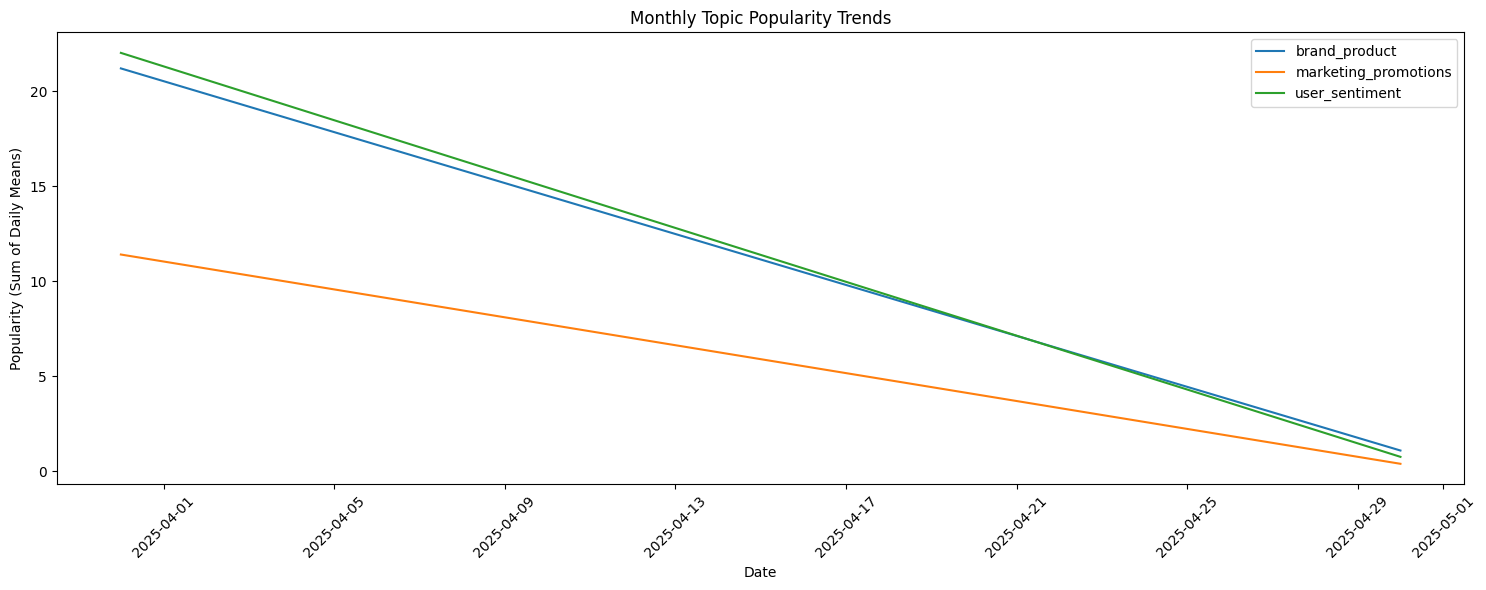

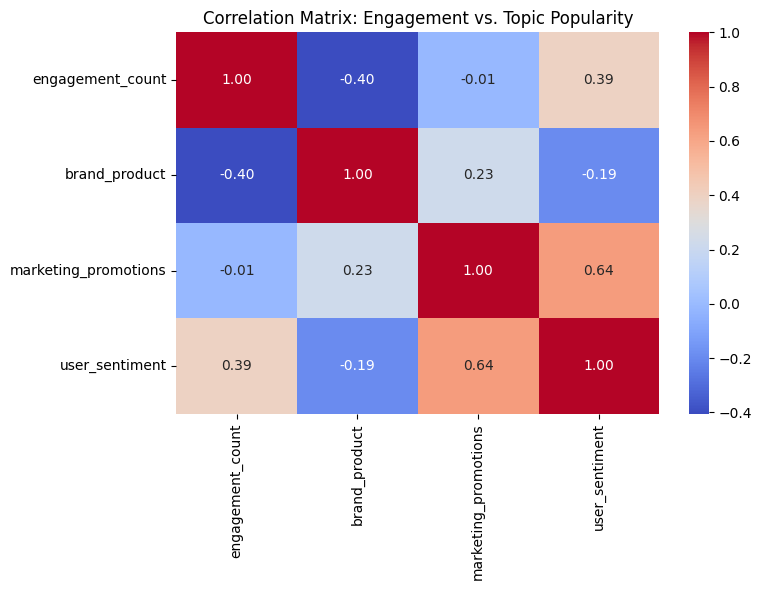

In [15]:
# Plotting monthly topic popularity trends
plt.figure(figsize=(15, 6))
for topic in topic_keywords.keys():
    plt.plot(monthly_topic_popularity['date'], monthly_topic_popularity[topic], label=topic)
plt.title('Monthly Topic Popularity Trends')
plt.xlabel('Date')
plt.ylabel('Popularity (Sum of Daily Means)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Generating heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Engagement vs. Topic Popularity')
plt.tight_layout()
plt.show()

**Key Insights:**

- The Instagram account experienced significant fluctuations in daily engagement,
  with notable high-engagement periods likely driven by specific content or events.
- Weekly trends show a peak in engagement in late March, followed by a decline.
- Topics related to "User Sentiment" appear to be the most positively correlated
  with engagement, highlighting the importance of incorporating user experiences
  and opinions in content.
- The negative correlation with "brand_product" is unexpected and warrants further
  investigation. It might indicate that the *way* brand and product topics are
  discussed matters more than just their presence.
- While marketing promotions can drive temporary engagement spikes, their overall
correlation with daily engagement across the period is weak.

To further understand the drivers of the major engagement spikes,
it would be beneficial to analyze the content posted on those specific high-engagement
dates and the surrounding context (e.g., if a major campaign or announcement occurred).

###Data Analysis Key Findings
- Daily engagement shows significant fluctuations,
- Brand/Product" and "User Sentiment" topic popularity generally exhibit similar daily and weekly patterns.
- There is a moderate positive correlation (0.39) between "user_sentiment" popularity and engagement count.
- There is a moderate negative correlation (-0.40) between "brand_product" popularity and engagement count.

###Insights or Next Steps
- Focus on content that emphasizes "User Sentiment" (opinions, positive experiences, desired products) as it is most positively correlated with engagement.
- Investigate the unexpected negative correlation with "Brand/Product" content to understand if the method of presentation (e.g., overly promotional vs. integrated into user stories) impacts engagement.


## Appendix

Apply BERT classification **on the combined text of media_caption and comment_text to categorize the content.

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification

# Ensure 'combined_text' is all strings and fill any potential NaNs
df['combined_text'] = df['combined_text'].astype(str).fillna('')


model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Preprocess the 'combined_text' column
encoded_data = tokenizer.batch_encode_plus(
    df['combined_text'].tolist(),
    add_special_tokens=True,
    return_attention_mask=True,
    padding='max_length',
    max_length=128,  # You might need to adjust this based on your text length
    truncation=True,
    return_tensors='pt'
)

input_ids = encoded_data['input_ids']
attention_masks = encoded_data['attention_mask']

print("Preprocessing complete. Sample input_ids and attention_masks:")
print(input_ids[:2])
print(attention_masks[:2])

In [19]:
print("Preprocessing complete. Sample input_ids and attention_masks:")
print(input_ids[:2])
print(attention_masks[:2])

Preprocessing complete. Sample input_ids and attention_masks:
tensor([[  101,  3730,  3096,  1010,  3730,  2166,   100,  2131,  2115,  2398,
          2006,  2023,  2969,  1011,  2729, 17070,   999,  1045,  6655,  2023,
          2003,  2204,   102,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     

In [ ]:
'''
The dataset was successfully preprocessed for BERT analysis,
including tokenization and the creation of attention masks. However, the BERT
classification task could not be completed due to the lack of labeled data for training.
'''

Identify topics of interest (k-means clustering)

In [ ]:
df['date'] = pd.to_datetime(df['timestamp'], format='mixed').dt.date
daily_topic_cluster_popularity = df.groupby('date')['topic_cluster'].mean().reset_index(name='mean_topic_cluster')
daily_topic_cluster_popularity['date'] = pd.to_datetime(daily_topic_cluster_popularity['date'])
daily_topic_cluster_popularity = daily_topic_cluster_popularity.sort_values(by='date')
display(daily_topic_cluster_popularity.head())

In [ ]:
weekly_topic_cluster_popularity = daily_topic_cluster_popularity.resample(
    'W', on='date')['mean_topic_cluster'].mean().reset_index(name='weekly_mean_topic_cluster')
monthly_topic_cluster_popularity = daily_topic_cluster_popularity.resample(
    'M', on='date')['mean_topic_cluster'].mean().reset_index(name='monthly_mean_topic_cluster')

print("Weekly Topic Cluster Popularity:")
display(weekly_topic_cluster_popularity.head())
print("\nMonthly Topic Cluster Popularity:")
display(monthly_topic_cluster_popularity.head())